##Libraries

In [63]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#to emulate R package's style ggplot
plt.style.use('ggplot')

In [64]:
#load iris dataset
iris = datasets.load_iris()

#have a look at the type of our dataset
type(iris)

sklearn.utils.Bunch

In [65]:
#see the keys of iris Bunch
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [66]:
#check the value of these keys
iris['filename']

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [67]:
#name of the features (columns)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
#lets print first 10 row in data
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [69]:
#labels of these data as numerical value
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
#name of labels as text
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [71]:
type(iris.data)

numpy.ndarray

In [72]:
type(iris.target)

numpy.ndarray

###Shape of Data

>```(150,4)``` the tuple shows this data has ```150 rows (records)``` with ```4 features (columns)```

In [73]:
iris.data.shape

(150, 4)

###EDA

In [74]:
##we assign the data and targets to X,y variables
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###Visual EDA

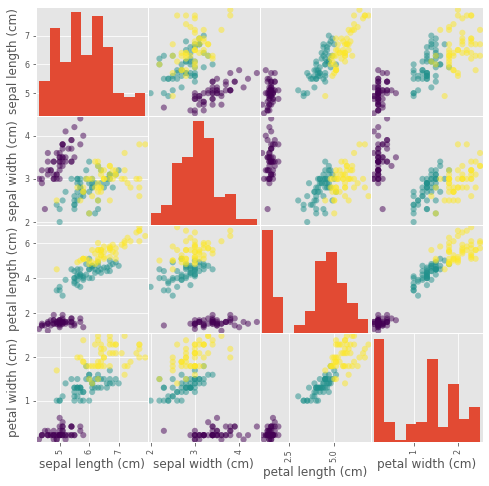

In [75]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker= '.')
#other markers 'D' and '^'
#c=y assigns the colors for each class

>We can see that petal_width and petal_length are correlated as we expect and they cluster as their species.

##Classification

#k-NN : Intuition on Pptx

##Scikit-learn model training

### train/test split

>Stratified Random Sampling

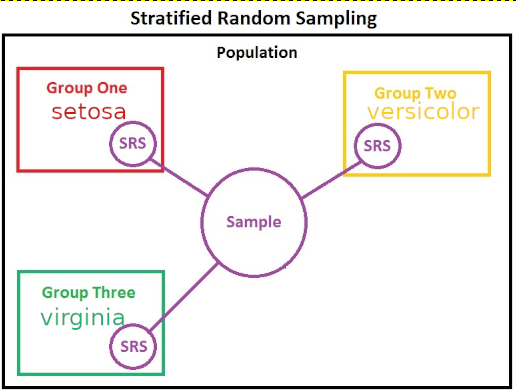

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [78]:
#predictions of our trained model
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

##Measuring model performance

In [79]:
knn.score(X_test, y_test)

0.9555555555555556

* In classification, accuracy is a commonly used metric.
* Accuracy = Fraction of correct predictions

In [80]:
predict_names = list()
for x in y_pred:
  predict_names.append(iris.target_names[x])

print(predict_names)

['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica', 'virginica', 'setosa', 'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor']


###Model complexity and how to choose best K value

In [81]:
k_range = range(2,8)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

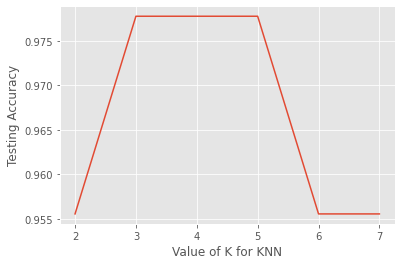

In [82]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')